# Modelo de Clasificación en Megaline (compañía móvil)

En este proyecto se realizará una continuación sobre el análisis de datos de la compañía móvil Megaline. La empresa quiere poder recomendar a sus clientes uno de los nuevos planes: Smart o Ultra. 

La idea con los datos, que ya se encuentran limpíos con el previo análisis que se realizó en un proyecto anterior, es crear un modelo de clasificación que ayude a escoger el plan correcto. El modelo debe estar enfocado en la *exactitud*, con un umbral de 0.75. 

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Información-general-del-estudio" data-toc-modified-id="Información-general-del-estudio-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Información general del estudio</a></span></li><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inicialización</a></span><ul class="toc-item"><li><span><a href="#Librerías" data-toc-modified-id="Librerías-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Librerías</a></span></li><li><span><a href="#Cargar-los-datos" data-toc-modified-id="Cargar-los-datos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cargar los datos</a></span></li><li><span><a href="#Estudio-de-información-general" data-toc-modified-id="Estudio-de-información-general-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Estudio de información general</a></span></li></ul></li><li><span><a href="#Análisis-de-los-parámetros" data-toc-modified-id="Análisis-de-los-parámetros-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Análisis de los parámetros</a></span></li><li><span><a href="#Implementación-del-modelo" data-toc-modified-id="Implementación-del-modelo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Implementación del modelo</a></span><ul class="toc-item"><li><span><a href="#Segmentación-de-los-conjuntos-de-datos." data-toc-modified-id="Segmentación-de-los-conjuntos-de-datos.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Segmentación de los conjuntos de datos.</a></span></li><li><span><a href="#Implementación-de-modelos-en-datos-de-entrenamiento-y-validación" data-toc-modified-id="Implementación-de-modelos-en-datos-de-entrenamiento-y-validación-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Implementación de modelos en datos de entrenamiento y validación</a></span><ul class="toc-item"><li><span><a href="#Árbol-de-decisión" data-toc-modified-id="Árbol-de-decisión-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Árbol de decisión</a></span></li><li><span><a href="#Bosque-aleatorio" data-toc-modified-id="Bosque-aleatorio-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Bosque aleatorio</a></span></li><li><span><a href="#Regresión-logística" data-toc-modified-id="Regresión-logística-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Regresión logística</a></span></li></ul></li><li><span><a href="#Mejor-modelo-en-datos-de-prueba" data-toc-modified-id="Mejor-modelo-en-datos-de-prueba-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Mejor modelo en datos de prueba</a></span><ul class="toc-item"><li><span><a href="#Árbol-de-decisión" data-toc-modified-id="Árbol-de-decisión-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Árbol de decisión</a></span></li><li><span><a href="#Bosque-aleatorio" data-toc-modified-id="Bosque-aleatorio-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Bosque aleatorio</a></span></li></ul></li><li><span><a href="#Prueba-de-cordura-al-modelo" data-toc-modified-id="Prueba-de-cordura-al-modelo-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Prueba de cordura al modelo</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

## Información general del estudio

A continuación, se presenta información a tomar en cuenta acerca de los datos: 

- `сalls` — número de llamadas
- `minutes` — duración total de la llamada en minutos
- `messages` — número de mensajes de texto
- `mb_used` — tráfico de Internet utilizado en MB
- `is_ultra` — plan para el mes actual (`Ultra` - `1`, `Smart` - `0`)


## Inicialización

### Librerías

Se inicia cargando todas las librerías de Python se utilizarán a lo largo del proyecto.

In [1]:
# cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

### Cargar los datos

Se carga los datos de los diferentes archivos

In [2]:
# carga del archivo en DataFrame
users_behavior = pd.read_csv("/datasets/users_behavior.csv")

### Estudio de información general

Comenzamos a revisar el contenido del archivo

In [3]:
# nombre columnas
print("Columns of 'users_behavior':", users_behavior.columns)
# número filas x columnas
print("")
print("Rows and columns of 'users_behavior':", users_behavior.shape)

Columns of 'users_behavior': Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

Rows and columns of 'users_behavior': (3214, 5)


Comprobamos la información que nos han proporcionado al inicio, como también verificar que tenemos 3214 datos o filas en total, siendo un DataFrame pequeño. 

Visualicemos la información inicial y una información resumida de la tabla `users_behavior`:

In [4]:
# revisión datos iniciales, tipos de datos
display(users_behavior.head())
print("")
print(users_behavior.info())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


Tenemos ya la base de datos limpia a nivel de valores ausentes. De ahí tenemos 4 variables con tipos de datos `float` y uno `int` que sería la variable categórica o binaria, `is_ultra`.

Sin embargo, vamos a cambiar los tipos de datos en las variables `calls` y `messages` a `int` ya que son datos numéricos discretos.  

In [5]:
# convertir los tipos de datos de float a int 
users_behavior['calls'] = users_behavior['calls'].astype(int)
users_behavior['messages'] = users_behavior['messages'].astype(int)

In [6]:
# comprobamos el cambio
display(users_behavior.head())
print("")
print(users_behavior.info())

,calls,minutes,messages,mb_used,is_ultra
0,40,311.90,83,19915.42,0
1,85,516.75,56,22696.96,0
2,77,467.66,86,21060.45,0
3,106,745.53,81,8437.39,1
4,66,418.74,1,14502.75,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 125.7 KB
None


## Análisis de los parámetros

Antes de realizar implementar el modelo, verifiquemos cómo están los datos en general para poder entender mejor el panorama entre los que tienen `Ultra - 1` y los que tienen `Smart - 0`. 

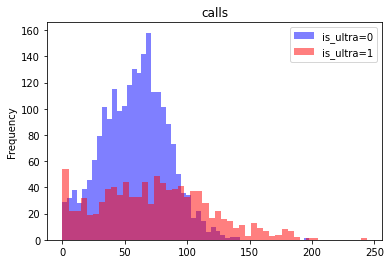

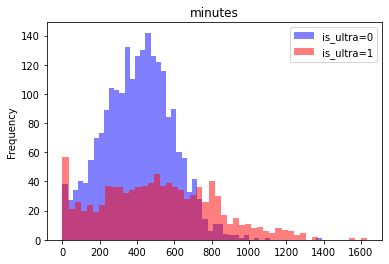

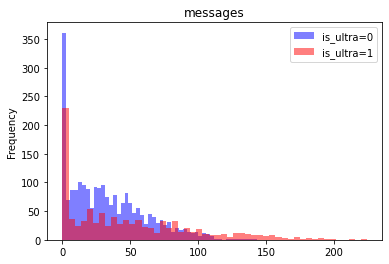

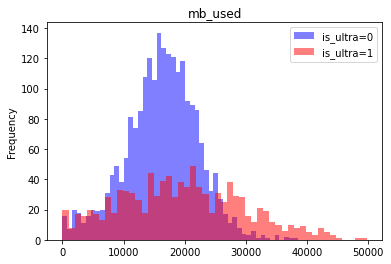

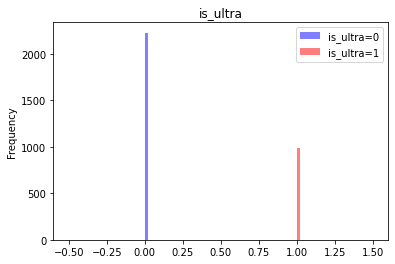

In [7]:
# graficar histogramas para cada columna, cuando is_ultra=0 and is_ultra=1
for col in users_behavior.columns:
    fig, ax = plt.subplots()
    users_behavior[users_behavior['is_ultra'] == 0][col].plot(kind="hist", bins=50, alpha=0.5, color='blue', label='is_ultra=0', ax=ax)
    users_behavior[users_behavior['is_ultra'] == 1][col].plot(kind="hist", bins=50, alpha=0.5, color='red', label='is_ultra=1', ax=ax)
    ax.set_title(col)
    ax.legend()
    plt.show()

Podemos en los gráficos de histogramas, que hay una mayor cantidad de clientes que utilizan el plan `Smart` en vez de `Ultra`. Y por esta razón, hay un menos consumo a nivel de número de llamadas, uso de minutos, mensajes enviados y uso de mb de datos. 

Con esta información tenemos un mejor entendimiento del comportamiento de los datos y de los clientes que utilizan los planes. 

## Implementación del modelo

### Segmentación de los conjuntos de datos. 

Para poder implementar cualquier modelo de machine learning, debemos separar las variables entre características (`features`) y objetivo (`target`), donde nuestra variable objetivo será `is_ultra`, ya que es la variable que vamos a categorizar en base a la información que tenemos. 

In [8]:
# declarar features y target
features = users_behavior.drop(["is_ultra"], axis=1)
target = users_behavior["is_ultra"]

# comprobamos
print(features.shape)
print(target.shape)

(3214, 4)
(3214,)


Listo, ahora en base a esta información, vamos a segmentar nuestra fuente de datos en conjunto de entrenamiento, de validación y de prueba. De esta forma nos aseguramos a mantener una cierta calidad en el modelo, y cuando implementemos, no sepa todas las respuestas antes de aprender el conjunto de entrenamiento. 

Como no tenemos un conjunto de prueba, vamos a dividir nuestra fuente de datos en 3:1:1 (60% datos de entrenamiento, 20% datos de validación y 20% datos de prueba). 

Con el dataset de validación ayudará a identificar modelos sobreajustados, y con el conjunto de prueba nos ayudará para una evaluación final del modelo entrenado. 

In [9]:
# Se divide primero en conjunto de entrenamiento_validacion y prueba
features_train_val, features_test, target_train_val, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Luego, se divide el conjunto de entrenamiento_validacion en entrenamiento y validación
features_train, features_val, target_train, target_val = train_test_split(features_train_val, target_train_val, test_size=0.25, random_state=42)

A continuación, comprobamos que nuestro dataset esté separado correctamente: 

In [10]:
# impresión del tamaño de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:", len(features_train))
print("Tamaño del conjunto de validación:", len(features_val))
print("Tamaño del conjunto de prueba:", len(features_test))

Tamaño del conjunto de entrenamiento: 1928
Tamaño del conjunto de validación: 643
Tamaño del conjunto de prueba: 643


In [11]:
# verificación distribución de datos
total = len(features)
train_ratio = len(features_train) / total
val_ratio = len(features_val) / total
test_ratio = len(features_test) / total

print("Proporción del conjunto de entrenamiento:", train_ratio)
print("Proporción del conjunto de validación:", val_ratio)
print("Proporción del conjunto de prueba:", test_ratio)
print("Total:", train_ratio + val_ratio + test_ratio)

Proporción del conjunto de entrenamiento: 0.5998755444928439
Proporción del conjunto de validación: 0.2000622277535781
Proporción del conjunto de prueba: 0.2000622277535781
Total: 1.0


### Implementación de modelos en datos de entrenamiento y validación

Perfecto, ahora que tenemos correctamente los datos, podemos investigar qué modelo se ajusta mejor a nuestros datos. 

#### Árbol de decisión

A continuación, se utilizará un for loop que ayudará a verificar qué hiperparámetro es mejor al momento de aplicar el árbol de decisión, con una máxima profundidad de 10. A partir de esto, obtendremos el `accuracy_score` que se utiliza específicamente en problemas de clasificación para evaluar la precisión del modelo. 

In [12]:
# variables iniciales
best_result = 0
best_depth = 0

# for loop para árbol de decisión con mejor hiperparámetro
for depth in range(1, 11):
        # aplicamos el modelo de árbol de decisión con distintos hiperparámetros
        model = DecisionTreeClassifier(max_depth=depth, random_state=125)
        
        # entrenamos el modelo con el conjunto de entrenamiento
        model.fit(features_train, target_train)
        
        # predicciones con el conjunto de validación
        predictions_valid = model.predict(features_val) 

        # precisión
        result = accuracy_score(target_val, predictions_valid)
        
        # mejor resultado
        if result > best_result:
            best_result = result
            best_depth = depth
            
print(f"La mejor puntuación de exactitud del conjunto de validación (max_depth = {best_depth}): {best_result}")

La mejor puntuación de exactitud del conjunto de validación (max_depth = 7): 0.7884914463452566


Al parecer, el modelo de Árbol de decisión llega a un umbral de exactitus de 0.7885 con una profundidad máxima de 7, siendo mayor de lo que necesitamos, que es 0.75. 

Por lo tanto, podríamos decir que el árbol de decisión con el hiperparámetro `max_depth = 7` nos ayudará dar buenas recomendaciones a los clientes que tienen otros planes, y dar alternativas entre `Smart` y `Ultra`, según el consumo de llamadas, mensajes y datos que tengan. 

Aún así, es importante poder verificar entre otros modelos y ver qué modelo nos da una mejor exactitud. 

#### Bosque aleatorio

Ahora se probará los datos de entrenamiento y validación con el modelo de bosque aleatorio de regresión, el cual se implementará de la misma forma que el árbol de decisión. El número de estimadores máximo será 10, y se obtendrá el mejor puntaje (`score`) para comprobar qué hiperparámetro se llega a la mejor exactitud. 

In [13]:
# variables iniciales
best_score = 0
best_est = 0

# for loop para bosque aleatorio con mejor hiperparámetro
for est in range(1, 11): 
    # aplicamos el modelo de bosque aleatorio con distintos hiperparámetros
    model = RandomForestClassifier(random_state=125, n_estimators=est) 
    
    # entrenamos el modelo con el conjunto de entrenamiento
    model.fit(features_train, target_train) 
    
    # predicciones con el conjunto de validación
    score = model.score(features_val, target_val) 
    
    # mejor resultado
    if score > best_score:
        best_score = score 
        best_est = est 

print(f"La mejor puntuación de exactitud del conjunto de validación (n_estimators = {best_est}): {best_score}")

La mejor puntuación de exactitud del conjunto de validación (n_estimators = 8): 0.7838258164852255


Implementando el bosque aleatorio, con el número de estimadores igual a 9, se llega a obtener una exactitud de 0.7838, siendo mayor que el umbral de 0.75, pero menor al puntaje del árbol de decisión que fue 0.7885, aunque es bien cercano, y no hay mayor diferencia. 

Por lo tanto, podríamos decir que el bosque aleatorio con el hiperparámetro `max_depth = 8` nos ayudará de igual forma a dar una buena clasificación entre los dos planes `Smart` y `Ultra`.

Sin embargo, podemos utilizar el último modelo para comprobar qué modelo se ajusta mejor a nuestros datos. 

#### Regresión logística

Por último, vamos a entrenar un modelo de regresión logística en el conjunto de entrenamiento, y luego calcular el valor de *accuracy* para el conjunto de validación, y así verificar qué valor obtenemos para ver qué modelo se ajusta mejor a nuestros datos. 

In [14]:
# inicializa el constructor de regresión logística con los parámetros random_state=125 y solver='liblinear'
model = LogisticRegression(random_state=125, solver="liblinear") 

# entrena el modelo en el conjunto de entrenamiento
model.fit(features_train, target_train) 

# calcula la puntuación de accuracy en el conjunto de validación
score_valid = model.score(features_val, target_val) 

# cálculo de exactitud
print("Accuracy del modelo de regresión logística en el conjunto de validación:", score_valid)

Accuracy del modelo de regresión logística en el conjunto de validación: 0.7216174183514774


El modelo de regresión con los datos de Megaline, no se ajusta al umbral mínimo de exactitud que necesitamos, que es 0.75, ya que obtuvimos un valor de 0.7216. Por lo tanto, no se recomendaría utilizar el modelo de regresión logística. 

### Mejor modelo en datos de prueba

Cómo los resultados del árbol de decisión y bosque aleatorio no tienen una gran diferencia al momento de probar con los datos de validación, se utilizará cada unos para verificar cómo predice con los datos de prueba. 

#### Árbol de decisión

Implementamos el modelo del árbol de decisión con un `max_depth` igual a 7 en los datos de prueba: 

In [15]:
# Entrenamos el modelo con el conjunto de entrenamiento y validación
model = DecisionTreeClassifier(max_depth=7, random_state=125)
model.fit(features_train_val, target_train_val)

# Predecimos las etiquetas para el conjunto de prueba
predictions_test = model.predict(features_test)

# Calculamos la precisión en el conjunto de prueba
accuracy = accuracy_score(target_test, predictions_test)

print(f"Precisión en el conjunto de prueba (max_depth = 7): {accuracy}")

Precisión en el conjunto de prueba (max_depth = 7): 0.8102643856920684


Llegamos a una precisión de 0.81, siendo bastante alto. 

#### Bosque aleatorio

Ahora implementamos con el bosque aleatorio donde `n_estimators` es igual a 8 en los datos de prueba. 

In [16]:
# Entrenamos el modelo con el conjunto de entrenamiento y validación
model = RandomForestClassifier(random_state=125, n_estimators=8)
model.fit(features_train_val, target_train_val)

# Predecimos las etiquetas para el conjunto de prueba
predictions_test = model.predict(features_test)

# Calculamos la precisión en el conjunto de prueba
accuracy = accuracy_score(target_test, predictions_test)

print(f"Precisión en el conjunto de prueba (n_estimators = 8): {accuracy}")

Precisión en el conjunto de prueba (n_estimators = 8): 0.7916018662519441


En este llegamos a una precisión de 0.79, siendo 2 decimas menores que el árbol de decisión, 0.81. 

Por lo tanto, el mejor modelo de clasificación para los datos de Megaline es el árbol de decisión. 

### Prueba de cordura al modelo

La prueba de cordura al modelo es una forma de verificar que la información que se tenga en el modelo de predicción tenga un comportamiento lógico, y se ajusta a lo que se espera del modelo. 

Una forma de utilizar la prueba de cordura es visualizar el árbol generado por el modelo. 

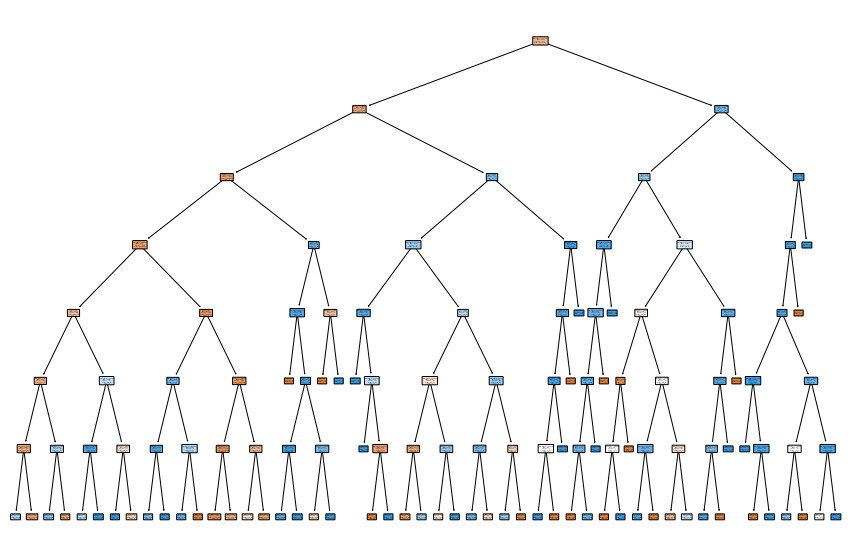

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Creamos el modelo con max_depth = 7
model = DecisionTreeClassifier(max_depth=7, random_state=125)
model.fit(features_train_val, target_train_val)

# Visualizamos el árbol generado por el modelo
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, rounded=True, feature_names=features.columns, class_names=['0', '1'])
plt.show()

A nivel general, se puede observar los 8 niveles del árbol de decisión, sin embargo, no podemos verificar cómo está el detalle aún, por lo tanto, se mejora el siguiente código para verlo de mejor manera. 

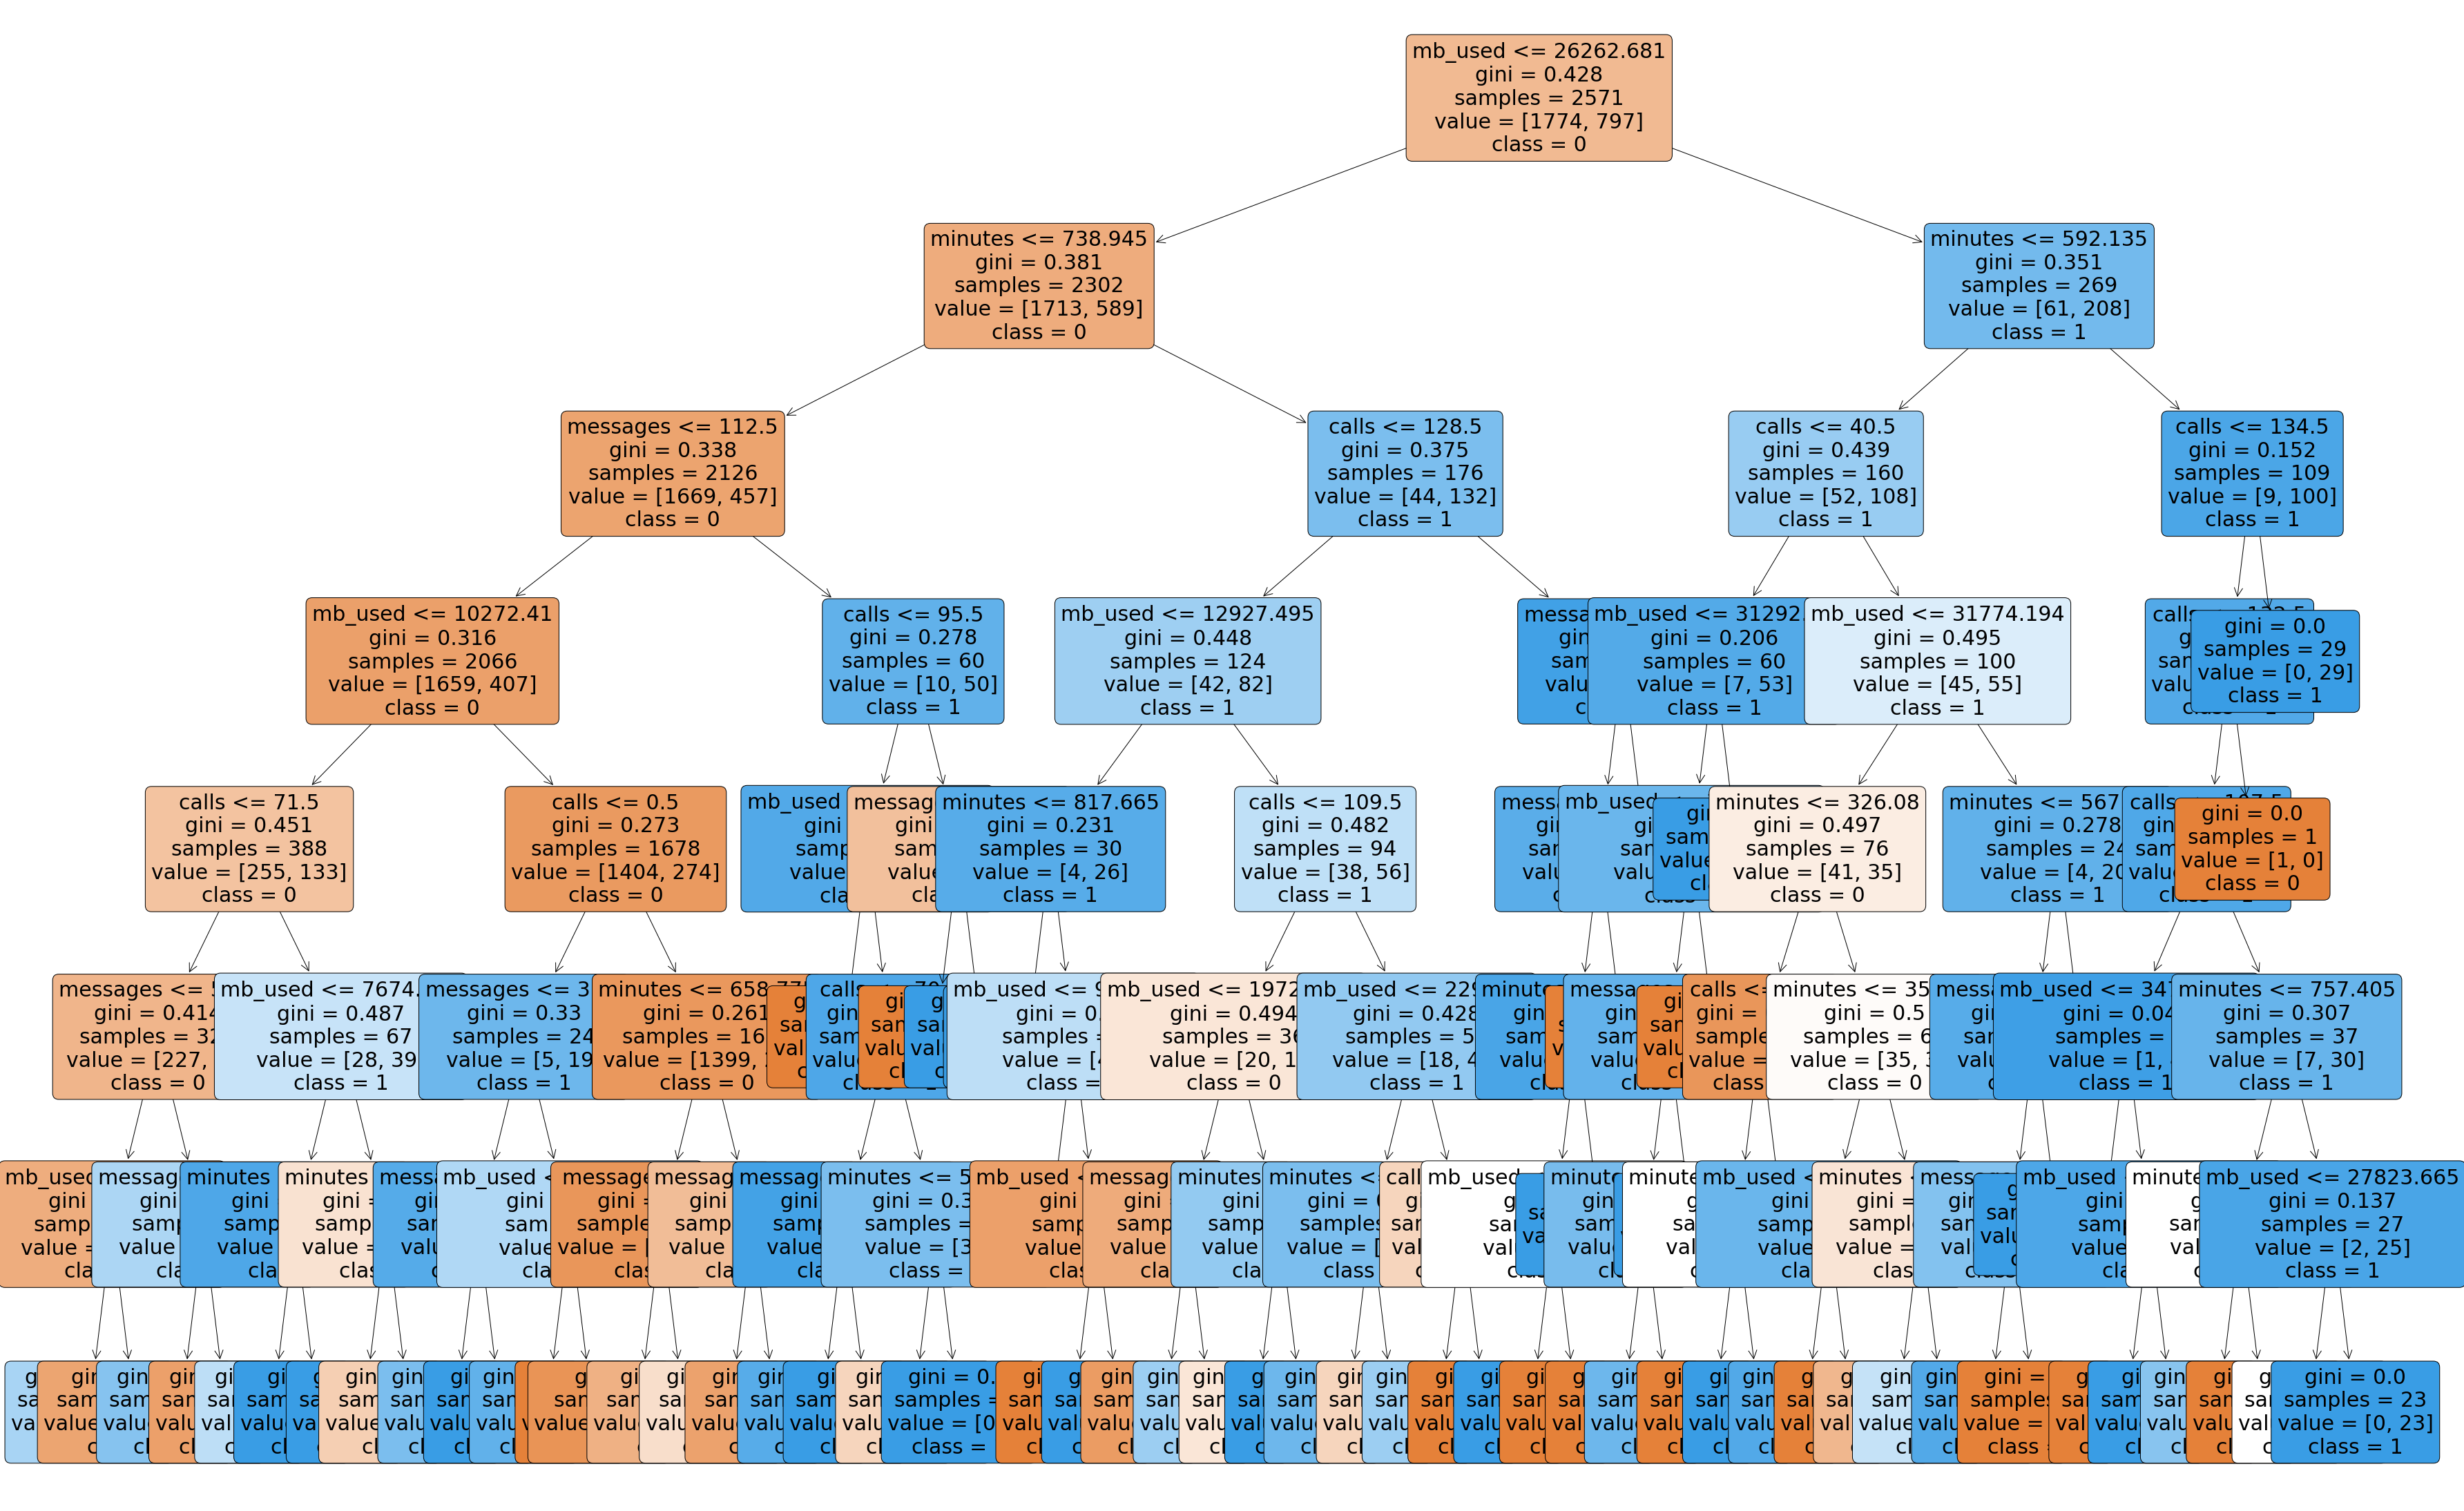

In [18]:
# Creamos el modelo con max_depth = 7
model = DecisionTreeClassifier(max_depth=7, random_state=125)
model.fit(features_train_val, target_train_val)

# Visualizamos el árbol generado por el modelo
plt.figure(figsize=(60,40))
plot_tree(model, filled=True, rounded=True, feature_names=features.columns, class_names=['0', '1'], fontsize=30)
plt.show()

Aunque se tenga detallado de forma más grande el árbol de clasificación, aún no se puede ver todo el detalle, por la profundidad que tiene. 

Sin embargo, otra forma de realizar la prueba de cordura es utilizar la matriz de confusión. Esta matriz es una tabla que muestra las predicciones del modelo en comparación con los resultados reales. 

In [19]:
# Creamos el modelo con max_depth = 7
model = DecisionTreeClassifier(max_depth=7, random_state=125)
model.fit(features_train_val, target_train_val)

# Hacemos las predicciones en el conjunto de prueba
predictions = model.predict(features_test)

# Obtenemos la matriz de confusión
conf_matrix = confusion_matrix(target_test, predictions)

# Visualizamos la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[430  25]
 [ 97  91]]


Los resultados de la matriz de confusión quieren decir que el modelo clasificó correctamente 430 casos que son verdaderos negativos (TN) y 91 casos que son verdaderos positivos (TP), clasificando incorrectamente 25 casos que son falsos positivos (FP) y 97 casos que son falsos negativos (FN). 

En base a estos datos, se obtiene la precisión de 0.81 que se obtuvo anteriormente. 

Por el momento, se dejará la prueba de cordura hasta aquí, ya que se espera entenderla mejor más adelante. 

## Conclusiones

En conclusión, tras el análisis de los datos de comportamiento de los suscriptores de Megaline y la implementación de tres modelos de clasificación diferentes, se encontró que el modelo de árbol de decisión con `max_depth = 7` fue el que mejor se ajustó a los datos, con una exactitud en el conjunto de prueba del 81%. Esto indica que el modelo de árbol de decisión es capaz de analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline con una alta precisión.

Este resultado es significativo para Megaline, ya que les permitirá ofrecer a sus clientes planes que se ajusten mejor a sus necesidades y comportamientos, lo que podría mejorar su satisfacción y reducir la tasa de clientes que utilizan planes heredados. En general, este proyecto demuestra la utilidad de los modelos de clasificación en la toma de decisiones empresariales y cómo la implementación adecuada de estos modelos puede tener un impacto positivo en la satisfacción del cliente y en el éxito empresarial.